# Set up Log Analytics

You will need to set up the Notebook to use the KqlMagic package to connect to LogAnalytics. I click on the Add Packages button top right and search and install or you can

In [ ]:
import sys
!{sys.executable} -m pip install Kqlmagic --no-cache-dir --upgrade

and check it is installed

In [ ]:
import sys
!{sys.executable} -m pip list

Then set the extension to open the web browser

In [1]:
%config Kqlmagic.popup_interaction='webbrowser_open_at_kernel'

Then load the extension into the Notebook


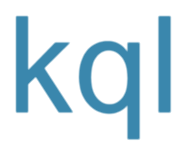

In [1]:
%reload_ext Kqlmagic

You can find help

In [ ]:
%kql --help "help" -popup_window

In [ ]:
%kql --help "LogAnalytics"

## Make a connection to Log Analytics

You will need your

- tenantid 
- clientid of the App with permissions 
- Client secret for above 
- Log Analytics WorkSpace ID
- Alias for the  log Analytics

or you can use

`%kql loganalytics://tenant='<tenantid>';clientid='<clientid>';clientsecret='<clientsecret>';workspace='<workspaceid>';alias='<alias>'`

or you can follow [Julie Koesmarno](https://twitter.com/MsSQLGirl) example from [here](https://github.com/MsSQLGirl/jubilant-data-wizards/blob/main/Simple%20Demo/Parameterization/SQLDBLog/AzureSQLLogsAndMetricsWithLogAnalytics.ipynb) and log in from the browser with 

`
%kql loganalytics://code;workspace=workspaceID;alias="myMonLog"  -try-azcli-login-by-profile`

In [8]:
# Initialize variables

workspaceID = ''
tenant = ''
clientid = ''
clientsecret = ''
alias = ''

In [9]:
if (workspaceID == ''):
    workspaceID = input("Enter Log Analytics Workspace ID (guid)")
    #print(workspaceID)
    print("workspaceID is set")
if (tenant == ''):
    tenant = input("Enter tenant")
    #print(tenant)
    print("tenant is set")
if (clientid == ''):
    clientid = input("Enter clientid (guid)")
    #print(clientid)
    print("clientid is set")
if (clientsecret == ''):
    clientsecret = input("Enter clientsecret ")
    #print(clientsecret)
    print("clientsecret is set")
if (alias == ''):
    alias = input("Enter alias ")
    #print(alias)
    print("alias is set")

workspaceID is set


tenant is set


clientid is set


clientsecret is set


alias is set


In [10]:
%kql loganalytics://tenant=tenant;clientid=clientid;clientsecret=clientsecret;workspace=workspaceID;alias=alias

## Query the logs

Now you can run Kusto Queries against the logs

### Show me Failed Logins



In [11]:
%kql sqlManagedInstances_logs_CL | where Message startswith "Logon       Login "| sort by es_process_timestamp_t desc |project node=kubernetes_node_name_s,namespace=kubernetes_namespace_s,pod=kubernetes_pod_name_s,container=kubernetes_container_name_s,["message time"]=es_process_timestamp_t,Message

,node,namespace,pod,container,message time,Message
0,aks-nodepool1-35148010-vmss000001,arc,benportal3-1,arc-sqlmi,2021-08-03 15:32:17+00:00,Logon Login failed for user '##ha-agent-...
1,aks-nodepool1-35148010-vmss000001,arc,benportal3-1,arc-sqlmi,2021-08-03 15:32:14+00:00,Logon Login failed for user '##ha-agent-...
2,aks-nodepool1-35148010-vmss000001,arc,benportal3-1,arc-sqlmi,2021-08-03 15:32:14+00:00,Logon Login failed for user 'system'. Re...
3,aks-nodepool1-35148010-vmss000001,arc,benportal3-1,arc-sqlmi,2021-08-03 15:32:14+00:00,Logon Login failed for user '##ha-agent-...
4,aks-nodepool1-35148010-vmss000001,arc,benportal3-1,arc-sqlmi,2021-08-03 15:32:14+00:00,Logon Login failed for user '##ha-agent-...
5,aks-nodepool1-35148010-vmss000001,arc,benportal3-1,arc-sqlmi,2021-08-03 15:32:14+00:00,Logon Login failed for user '##ha-agent-...
6,aks-nodepool1-35148010-vmss000001,arc,benportal3-1,arc-sqlmi,2021-08-03 15:32:14+00:00,Logon Login failed for user '##ha-agent-...
7,aks-nodepool1-35148010-vmss000001,arc,benportal3-1,arc-sqlmi,2021-08-03 15:32:14+00:00,Logon Login failed for user '##ha-agent-...
8,aks-nodepool1-35148010-vmss000001,arc,benportal3-1,arc-sqlmi,2021-08-03 15:32:14+00:00,Logon Login failed for user 'sa'. Reason...
9,aks-nodepool1-35148010-vmss000001,arc,benportal3-1,arc-sqlmi,2021-08-03 15:32:14+00:00,Logon Login failed for user '##ha-agent-...


[{'node': 'aks-nodepool1-35148010-vmss000001', 'namespace': 'arc', 'pod': 'benportal3-1', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 32, 17, tzinfo=tzutc()), 'Message': "Logon       Login failed for user '##ha-agent-login##'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.1.7]"},
 {'node': 'aks-nodepool1-35148010-vmss000001', 'namespace': 'arc', 'pod': 'benportal3-1', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 32, 14, tzinfo=tzutc()), 'Message': "Logon       Login failed for user '##ha-agent-login##'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.1.7]"},
 {'node': 'aks-nodepool1-35148010-vmss000001', 'namespace': 'arc', 'pod': 'benportal3-1', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 32, 14, tzinfo=tzutc()), 'Message': "Logon       Login failed for user 'system'. Reason: Could not find a login matching the name provided. [CLIENT: ::1]"},
 {'node': 'aks-nodepool1-35148010-vmss000001', 'namespace': 'arc', 'pod': 'benportal3-1', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 32, 14, tzinfo=tzutc()), 'Message': "Logon       Login failed for user '##ha-agent-login##'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.1.7]"},
 {'node': 'aks-nodepool1-35148010-vmss000001', 'namespace': 'arc', 'pod': 'benportal3-1', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 32, 14, tzinfo=tzutc()), 'Message': "Logon       Login failed for user '##ha-agent-login##'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.1.7]"},
 {'node': 'aks-nodepool1-35148010-vmss000001', 'namespace': 'arc', 'pod': 'benportal3-1', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 32, 14, tzinfo=tzutc()), 'Message': "Logon       Login failed for user '##ha-agent-login##'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.1.7]"},
 {'node': 'aks-nodepool1-35148010-vmss000001', 'namespace': 'arc', 'pod': 'benportal3-1', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 32, 14, tzinfo=tzutc()), 'Message': "Logon       Login failed for user '##ha-agent-login##'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.1.7]"},
 {'node': 'aks-nodepool1-35148010-vmss000001', 'namespace': 'arc', 'pod': 'benportal3-1', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 32, 14, tzinfo=tzutc()), 'Message': "Logon       Login failed for user '##ha-agent-login##'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.1.7]"},
 {'node': 'aks-nodepool1-35148010-vmss000001', 'namespace': 'arc', 'pod': 'benportal3-1', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 32, 14, tzinfo=tzutc()), 'Message': "Logon       Login failed for user 'sa'. Reason: An error occurred while evaluating the password. [CLIENT: ::1]"},
 {'node': 'aks-nodepool1-35148010-vmss000001', 'namespace': 'arc', 'pod': 'benportal3-1', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 32, 14, tzinfo=tzutc()), 'Message': "Logon       Login failed for user '##ha-agent-login##'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.1.7]"},
 {'node': 'aks-nodepool1-35148010-vmss000002', 'namespace': 'arc', 'pod': 'benportal3-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 32, 11, tzinfo=tzutc()), 'Message': "Logon       Login failed for user '##ha-agent-login##'. Reason: Could not find a login matching the name provided. [CLIENT: 10.244.2.13]"},
 {'node': 'aks-nodepool1-35148010-vmss000002', 'namespace': 'arc', 'pod': 'benportal3-0', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 32, 5, tzinfo=tzutc()), 'Message': "Logon       Login failed for user '##ha-agent-login##'. Reason: Could not find 

### Show me Backups

In [12]:
%kql sqlManagedInstances_logs_CL | where Message startswith "Backup"| sort by es_process_timestamp_t desc |project node=kubernetes_node_name_s,namespace=kubernetes_namespace_s,pod=kubernetes_pod_name_s,container=kubernetes_container_name_s,["message time"]=es_process_timestamp_t,Message

,node,namespace,pod,container,message time,Message
0,aks-nodepool1-35148010-vmss000000,arc,benportal3-2,arc-sqlmi,2021-08-03 15:47:44+00:00,Backup BACKUP failed to complete the comm...
1,aks-nodepool1-35148010-vmss000000,arc,benportal3-2,arc-sqlmi,2021-08-03 15:47:38+00:00,"Backup Error: 3041, Severity: 16, State: 1."
2,aks-nodepool1-35148010-vmss000000,arc,benportal3-2,arc-sqlmi,2021-08-03 15:47:38+00:00,"Backup Error: 3041, Severity: 16, State: 1."
3,aks-nodepool1-35148010-vmss000000,arc,benportal3-2,arc-sqlmi,2021-08-03 15:47:38+00:00,Backup BACKUP failed to complete the comm...
4,aks-nodepool1-35148010-vmss000000,arc,benportal3-2,arc-sqlmi,2021-08-03 15:47:38+00:00,"Backup Error: 3041, Severity: 16, State: 1."
5,aks-nodepool1-35148010-vmss000000,arc,benportal3-2,arc-sqlmi,2021-08-03 15:47:38+00:00,Backup BACKUP failed to complete the comm...
6,aks-nodepool1-35148010-vmss000001,arc,benportal3-1,arc-sqlmi,2021-08-03 15:47:29+00:00,Backup BACKUP failed to complete the comm...
7,aks-nodepool1-35148010-vmss000001,arc,benportal3-1,arc-sqlmi,2021-08-03 15:47:25+00:00,Backup BACKUP failed to complete the comm...
8,aks-nodepool1-35148010-vmss000001,arc,benportal3-1,arc-sqlmi,2021-08-03 15:47:25+00:00,"Backup Error: 3041, Severity: 16, State: 1."
9,aks-nodepool1-35148010-vmss000001,arc,benportal3-1,arc-sqlmi,2021-08-03 15:47:25+00:00,"Backup Error: 3041, Severity: 16, State: 1."


[{'node': 'aks-nodepool1-35148010-vmss000000', 'namespace': 'arc', 'pod': 'benportal3-2', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 47, 44, tzinfo=tzutc()), 'Message': 'Backup      BACKUP failed to complete the command BACKUP DATABASE BenBenjiBenBenBen. Check the backup application log for detailed messages.'},
 {'node': 'aks-nodepool1-35148010-vmss000000', 'namespace': 'arc', 'pod': 'benportal3-2', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 47, 38, tzinfo=tzutc()), 'Message': 'Backup      Error: 3041, Severity: 16, State: 1.'},
 {'node': 'aks-nodepool1-35148010-vmss000000', 'namespace': 'arc', 'pod': 'benportal3-2', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 47, 38, tzinfo=tzutc()), 'Message': 'Backup      Error: 3041, Severity: 16, State: 1.'},
 {'node': 'aks-nodepool1-35148010-vmss000000', 'namespace': 'arc', 'pod': 'benportal3-2', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 47, 38, tzinfo=tzutc()), 'Message': 'Backup      BACKUP failed to complete the command BACKUP DATABASE msdb. Check the backup application log for detailed messages.'},
 {'node': 'aks-nodepool1-35148010-vmss000000', 'namespace': 'arc', 'pod': 'benportal3-2', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 47, 38, tzinfo=tzutc()), 'Message': 'Backup      Error: 3041, Severity: 16, State: 1.'},
 {'node': 'aks-nodepool1-35148010-vmss000000', 'namespace': 'arc', 'pod': 'benportal3-2', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 47, 38, tzinfo=tzutc()), 'Message': 'Backup      BACKUP failed to complete the command BACKUP DATABASE master. Check the backup application log for detailed messages.'},
 {'node': 'aks-nodepool1-35148010-vmss000001', 'namespace': 'arc', 'pod': 'benportal3-1', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 47, 29, tzinfo=tzutc()), 'Message': 'Backup      BACKUP failed to complete the command BACKUP DATABASE master. Check the backup application log for detailed messages.'},
 {'node': 'aks-nodepool1-35148010-vmss000001', 'namespace': 'arc', 'pod': 'benportal3-1', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 47, 25, tzinfo=tzutc()), 'Message': 'Backup      BACKUP failed to complete the command BACKUP DATABASE BenBenjiBenBenBen. Check the backup application log for detailed messages.'},
 {'node': 'aks-nodepool1-35148010-vmss000001', 'namespace': 'arc', 'pod': 'benportal3-1', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 47, 25, tzinfo=tzutc()), 'Message': 'Backup      Error: 3041, Severity: 16, State: 1.'},
 {'node': 'aks-nodepool1-35148010-vmss000001', 'namespace': 'arc', 'pod': 'benportal3-1', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 47, 25, tzinfo=tzutc()), 'Message': 'Backup      Error: 3041, Severity: 16, State: 1.'},
 {'node': 'aks-nodepool1-35148010-vmss000001', 'namespace': 'arc', 'pod': 'benportal3-1', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 47, 25, tzinfo=tzutc()), 'Message': 'Backup      BACKUP failed to complete the command BACKUP DATABASE msdb. Check the backup application log for detailed messages.'},
 {'node': 'aks-nodepool1-35148010-vmss000001', 'namespace': 'arc', 'pod': 'benportal3-1', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 47, 25, tzinfo=tzutc()), 'Message': 'Backup      Error: 3041, Severity: 16, State: 1.'},
 {'node': 'aks-nodepool1-35148010-vmss000000', 'namespace': 'arc', 'pod': 'benportal3-2', 'container': 'arc-sqlmi', 'message time': datetime.datetime(2021, 8, 3, 15, 47, 12, tzinfo=tzutc()), 'Message': 'Backup      BACKUP failed to complete the command BACKUP DATABASE BenBenjiBenBenBen. Check the backup application log for detailed messages.'},
 {'node': 'aks-nodepool1-35148010-vmss000000', 'namespace': 'arc', 'pod': 'benportal3-2',

### Show Me

In [13]:
%kql sqlManagedInstances_logs_CL | where Message startswith "Logon       Login "| sort by es_process_timestamp_t desc | summarize NoOfFailedLogins=count() by Hour=bin(es_process_timestamp_t,1h) | render columnchart 

[{'Hour': datetime.datetime(2021, 7, 28, 11, 0, tzinfo=tzutc()), 'NoOfFailedLogins': 23},
 {'Hour': datetime.datetime(2021, 7, 28, 12, 0, tzinfo=tzutc()), 'NoOfFailedLogins': 1},
 {'Hour': datetime.datetime(2021, 7, 29, 7, 0, tzinfo=tzutc()), 'NoOfFailedLogins': 4},
 {'Hour': datetime.datetime(2021, 7, 29, 8, 0, tzinfo=tzutc()), 'NoOfFailedLogins': 4},
 {'Hour': datetime.datetime(2021, 7, 28, 13, 0, tzinfo=tzutc()), 'NoOfFailedLogins': 1},
 {'Hour': datetime.datetime(2021, 8, 3, 15, 0, tzinfo=tzutc()), 'NoOfFailedLogins': 30}]